In [182]:
import pandas as pd
import numpy as np
import warnings
# Load the startup dataset into a DataFrame
startup_df = pd.read_csv('C:\\Users\\DELL\\Desktop\\ML\\Startups1.csv')
startup_df.head(5)

,Unnamed: 0,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,0,Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan","Apps, Home Services, Marketplace, Service Indu...",Urban is a marketplace for independent contrac...,1001-5000,445920356,12,16
1,1,Classplus,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, N...","B2B, E-Learning, EdTech, Education, Mobile App...",Classplus is a mobile-first SaaS platform that...,101-250,89506451,10,20
2,2,Paytm,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma","E-Commerce, Finance, Financial Services, Inter...",Paytm is a payment gateway that allows users a...,501-1000,32448851,4,4
3,3,Apna,Mumbai,2019,Nirmit Parikh,"Employment, Human Resources, Recruiting, Staff...",Apna is a professional networking and job-sear...,101-250,93450000,4,6
4,4,Razorpay,Bengaluru,2014,"Harshil Mathur, Shashank Kumar","Financial Services, FinTech, Payments, Software","Razorpay is a payment acceptance, processing, ...",1001-5000,366600000,7,29


In [71]:
# Extract the text data from the 'Description' column
text_data = startup_df.Description.values.tolist()
text_data

['Urban is a marketplace for independent contractors.',
 'Classplus is a mobile-first SaaS platform that allows 3000+ tutors to totally automate their curriculum and operations.',
 'Paytm is a payment gateway that allows users and businesses to make payments.',
 'Apna is a professional networking and job-search platform that connects blue- and gray-collar professionals with like-minded people and places to work.',
 'Razorpay is a payment acceptance, processing, and disbursement platform for businesses.',
 'UpGrad is a higher education portal that offers courses in Data Science, Technology, Management, and Law online.',
 'Delhivery is a supply chain management firm that specializes in transportation, warehousing, freight, and order fulfillment.',
 '1mg is a generic drug engine and online pharmacy network platform.',
 "BigBasket is an online grocery and meal delivery service that brings personal and household items to customers' doorsteps.",
 'GoMechanic is an online vehicle repair platf

In [72]:
#Data Cleaning 
#Converting List into String
data = ' '.join(text_data)
data



'Urban is a marketplace for independent contractors. Classplus is a mobile-first SaaS platform that allows 3000+ tutors to totally automate their curriculum and operations. Paytm is a payment gateway that allows users and businesses to make payments. Apna is a professional networking and job-search platform that connects blue- and gray-collar professionals with like-minded people and places to work. Razorpay is a payment acceptance, processing, and disbursement platform for businesses. UpGrad is a higher education portal that offers courses in Data Science, Technology, Management, and Law online. Delhivery is a supply chain management firm that specializes in transportation, warehousing, freight, and order fulfillment. 1mg is a generic drug engine and online pharmacy network platform. BigBasket is an online grocery and meal delivery service that brings personal and household items to customers\' doorsteps. GoMechanic is an online vehicle repair platform that allows consumers to arrange

In [73]:
#str(data[0]).split(".")

In [74]:
type(data)
print(data)

Urban is a marketplace for independent contractors. Classplus is a mobile-first SaaS platform that allows 3000+ tutors to totally automate their curriculum and operations. Paytm is a payment gateway that allows users and businesses to make payments. Apna is a professional networking and job-search platform that connects blue- and gray-collar professionals with like-minded people and places to work. Razorpay is a payment acceptance, processing, and disbursement platform for businesses. UpGrad is a higher education portal that offers courses in Data Science, Technology, Management, and Law online. Delhivery is a supply chain management firm that specializes in transportation, warehousing, freight, and order fulfillment. 1mg is a generic drug engine and online pharmacy network platform. BigBasket is an online grocery and meal delivery service that brings personal and household items to customers' doorsteps. GoMechanic is an online vehicle repair platform that allows consumers to arrange c

In [75]:
data = pd.Series(data)
data

0    Urban is a marketplace for independent contrac...
dtype: object

In [76]:
# Remove new line characters
#data = [re.sub('\s+', ' ', sent) for sent in data]
#data

In [77]:
str(data[0]).split(".")

['Urban is a marketplace for independent contractors',
 ' Classplus is a mobile-first SaaS platform that allows 3000+ tutors to totally automate their curriculum and operations',
 ' Paytm is a payment gateway that allows users and businesses to make payments',
 ' Apna is a professional networking and job-search platform that connects blue- and gray-collar professionals with like-minded people and places to work',
 ' Razorpay is a payment acceptance, processing, and disbursement platform for businesses',
 ' UpGrad is a higher education portal that offers courses in Data Science, Technology, Management, and Law online',
 ' Delhivery is a supply chain management firm that specializes in transportation, warehousing, freight, and order fulfillment',
 ' 1mg is a generic drug engine and online pharmacy network platform',
 " BigBasket is an online grocery and meal delivery service that brings personal and household items to customers' doorsteps",
 ' GoMechanic is an online vehicle repair platf

In [141]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\ProgramData\Anaconda3\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\ProgramData\Anaconda3\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [142]:
# now lets deal with stopwords 
# using nltk stopwords 
# “a”, “an”, “the”, “of”, “in”, etc. The stopwords in nltk are the most common words in data They are pre-defined and cannot be removed.
from nltk.corpus import stopwords  
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
len(stop_words)

184

In [143]:
#word_tokenize is a function in Python that splits a given sentence into words using the NLTK library.
from nltk import word_tokenize 

In [144]:
data_final = data.apply(lambda x:' '.join([word for word in word_tokenize(x) if word not in stop_words and len(word)> 2]))

In [145]:
data_final[0]

"Urban marketplace independent contractors Classplus mobile-first SaaS platform allows 3000+ tutors totally automate curriculum operations Paytm payment gateway allows users businesses make payments Apna professional networking job-search platform connects blue- gray-collar professionals like-minded people places work Razorpay payment acceptance processing disbursement platform businesses UpGrad higher education portal offers courses Data Science Technology Management Law online Delhivery supply chain management firm specializes transportation warehousing freight order fulfillment 1mg generic drug engine online pharmacy network platform BigBasket online grocery meal delivery service brings personal household items customers doorsteps GoMechanic online vehicle repair platform allows consumers arrange car maintenance convenient time Unacademy web-based learning portal offers educational materials video lectures exams Ola Indian mobility platform ride-hailing firm Licious online meat seaf

In [146]:
words_list = []
for sentence in data_final:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)
# freq_dist.keys()

[('platform', 72),
 ('online', 52),
 ('India', 48),
 ('company', 40),
 ('firm', 28),
 ('services', 26),
 ('allows', 21),
 ('offers', 21),
 ('provides', 21),
 ('businesses', 19),
 ('service', 19),
 ('products', 18),
 ('marketplace', 17),
 ('technology', 14),
 ('mobile', 14),
 ('users', 13),
 ('management', 13),
 ('customers', 13),
 ('business', 13),
 ('makes', 13)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


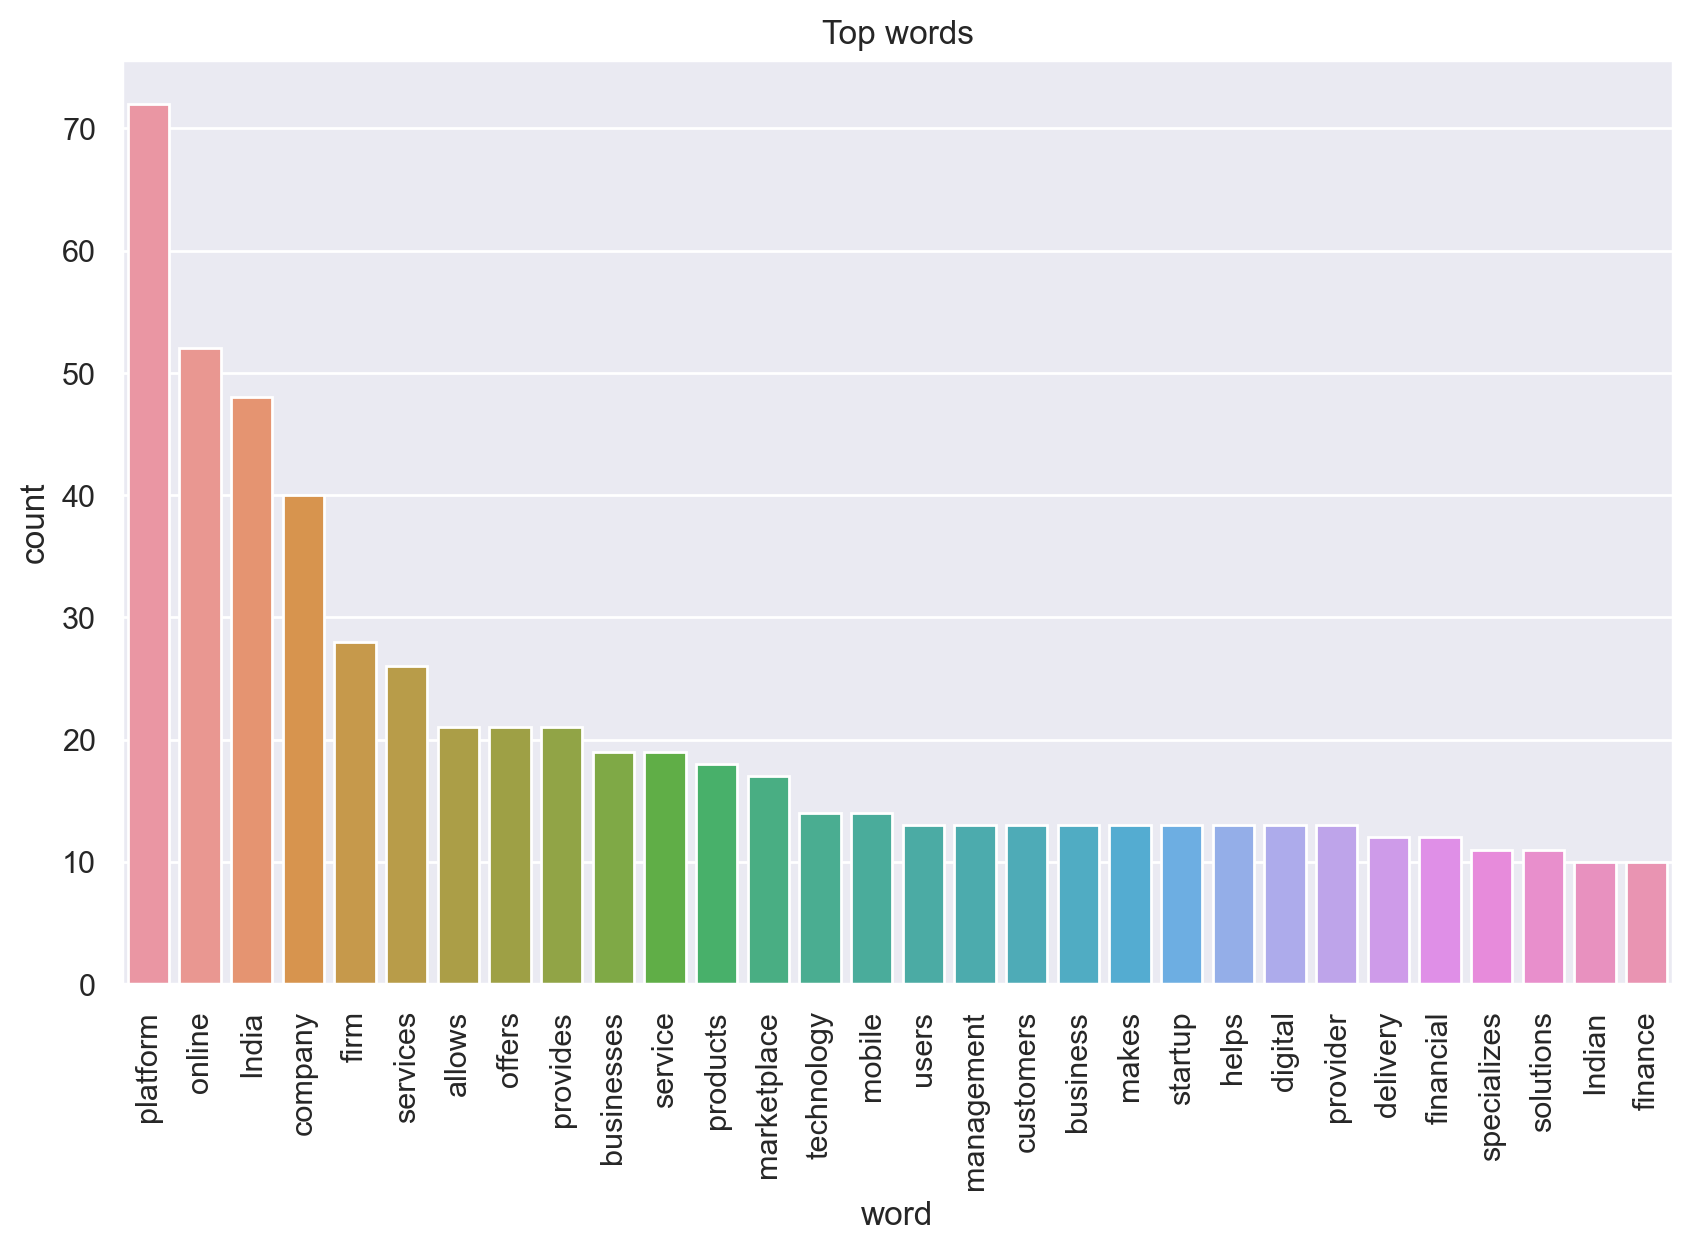

In [147]:
# creating a temporary dataframe and plotting the graph
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical');

In [148]:
## now lets create a Bigram and trigram for more sense
#loading libraries 
# Gensim is designed to process raw, unstructured digital texts (“plain text”) using unsupervised machine learning algorithms.
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import models

In [149]:
words_sent = [x.split() for x in data_final]
words_sent
bigram = Phrases(words_sent, min_count=5, threshold=100)
trigram = Phrases(bigram[words_sent], threshold=100)  

bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)

# bow = [bigram_phraser[word] for word in words_sent] # creating bigram
bow = [trigram_phraser[bigram_phraser[word]] for word in words_sent] # creating trigram and bigrambb 

In [150]:
bow[0:1]

[['Urban',
  'marketplace',
  'independent',
  'contractors',
  'Classplus',
  'mobile-first',
  'SaaS',
  'platform',
  'allows',
  '3000+',
  'tutors',
  'totally',
  'automate',
  'curriculum',
  'operations',
  'Paytm',
  'payment',
  'gateway',
  'allows_users',
  'businesses',
  'make',
  'payments',
  'Apna',
  'professional',
  'networking',
  'job-search',
  'platform',
  'connects',
  'blue-',
  'gray-collar',
  'professionals',
  'like-minded',
  'people',
  'places',
  'work',
  'Razorpay',
  'payment',
  'acceptance',
  'processing',
  'disbursement',
  'platform',
  'businesses',
  'UpGrad',
  'higher',
  'education',
  'portal',
  'offers',
  'courses',
  'Data',
  'Science',
  'Technology',
  'Management',
  'Law',
  'online',
  'Delhivery',
  'supply',
  'chain',
  'management',
  'firm',
  'specializes',
  'transportation',
  'warehousing',
  'freight',
  'order',
  'fulfillment',
  '1mg',
  'generic',
  'drug',
  'engine',
  'online',
  'pharmacy',
  'network',
  'pl

In [151]:
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 12.8/12.8 MB 710.4 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [152]:

### lemmatisation by using spacy and pos tagging
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) # disabing the parse and ner from pipeline it increase speed of pipeline

# here 'en' in spacy pipeline means the small version of language

In [153]:
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 12.8/12.8 MB 451.5 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [154]:
doc = nlp(' '.join(bow[0]))
for token in doc:
    print(token ,'=>', token.pos_)

Urban => ADJ
marketplace => NOUN
independent => ADJ
contractors => NOUN
Classplus => PROPN
mobile => NOUN
- => PUNCT
first => ADV
SaaS => NOUN
platform => NOUN
allows => VERB
3000 => NUM
+ => CCONJ
tutors => NOUN
totally => ADV
automate => VERB
curriculum => NOUN
operations => NOUN
Paytm => PROPN
payment => NOUN
gateway => NOUN
allows_users => NOUN
businesses => NOUN
make => VERB
payments => NOUN
Apna => PROPN
professional => ADJ
networking => NOUN
job => NOUN
- => PUNCT
search => NOUN
platform => NOUN
connects => VERB
blue- => ADJ
gray => ADJ
- => PUNCT
collar => NOUN
professionals => NOUN
like => ADJ
- => PUNCT
minded => ADJ
people => NOUN
places => NOUN
work => VERB
Razorpay => PROPN
payment => NOUN
acceptance => NOUN
processing => NOUN
disbursement => NOUN
platform => NOUN
businesses => NOUN
UpGrad => ADV
higher => ADJ
education => NOUN
portal => NOUN
offers => VERB
courses => NOUN
Data => PROPN
Science => PROPN
Technology => PROPN
Management => PROPN
Law => PROPN
online => NOUN
De

In [155]:
#Visualisation of topic modelling
! pip install pyLDAvis

Defaulting to user installation because normal site-packages is not writeable


In [156]:
# such as tokenization, named entity recognition with pre-trained models for several languages.
import spacy

# Load the spaCy NER model
nlp = spacy.load("en_core_web_sm")

# Function to perform NER on a given text
def perform_ner(text):
    doc = nlp(text) # Process the text with spaCy NER model
    named_entities = []
    for ent in doc.ents: # Extract named entities from the processed text
        named_entities.append(ent.text)
    return named_entities

# Example usage
text = "Urban is a marketplace for independent contractors. Classplus is a mobile-first SaaS platform that allows 3000+ tutors to totally automate their curriculum and operations. Paytm is a payment gateway that allows users and businesses to make payments. Apna is a professional networking and job-search platform that connects blue- and gray-collar professionals with like-minded people and places to work. Razorpay is a payment acceptance, processing, and disbursement platform for businesses. UpGrad is a higher education portal that offers courses in Data Science, Technology, Management, and Law online. Delhivery is a supply chain management firm that specializes in transportation, warehousing, freight, and order fulfillment. 1mg is a generic drug engine and online pharmacy network platform.."
named_entities = perform_ner(text)
print(named_entities)

['Urban', '3000', 'Razorpay', 'UpGrad', 'Data Science, Technology, Management', 'Law']


In [158]:
# NLP Tutorial: Named Entity Recognition (NER)
import spacy


In [159]:
nlp = spacy.load("en_core_web_sm")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [180]:
doc = nlp("Tesla Inc is going to acquire Twitter Inc for $45 billion")
for ent in doc.ents:  #function
    print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))

Tesla Inc  |  ORG  |  Companies, agencies, institutions, etc.
Twitter Inc  |  ORG  |  Companies, agencies, institutions, etc.
$45 billion  |  MONEY  |  Monetary values, including unit


In [181]:
from spacy import displacy

displacy.render(doc, style="ent")

In [162]:
# List down all the entities
nlp.pipe_labels['ner']

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

In [163]:
doc = nlp("Michael Bloomberg founded Bloomberg in 1982")
for ent in doc.ents:
    print(ent.text, "|", ent.label_, "|", spacy.explain(ent.label_))

Michael Bloomberg | PERSON | People, including fictional
Bloomberg | PERSON | People, including fictional
1982 | DATE | Absolute or relative dates or periods


In [164]:
#  Here also go through 3 sample examples for NER

In [165]:
doc = nlp("Tesla Inc is going to acquire Twitter Inc for $45 billion")
for ent in doc.ents:
    print(ent.text, " | ", ent.label_, " | ", ent.start_char, "|", ent.end_char)

Tesla Inc  |  ORG  |  0 | 9
Twitter Inc  |  ORG  |  30 | 41
$45 billion  |  MONEY  |  46 | 57


In [166]:
# Setting custom entities

In [167]:
doc = nlp("Tesla is going to acquire Twitter for $45 billion")
for ent in doc.ents:
    print(ent.text, " | ", ent.label_)

Tesla  |  ORG
Twitter  |  PRODUCT
$45 billion  |  MONEY


In [168]:
s = doc[2:5]
s

going to acquire

In [169]:
type(s)

spacy.tokens.span.Span

In [170]:
from spacy.tokens import Span

s1 = Span(doc, 0, 1, label="ORG")
s2 = Span(doc, 5, 6, label="ORG")

doc.set_ents([s1, s2], default="unmodified")

In [171]:
for ent in doc.ents:
    print(ent.text, " | ", ent.label_)

Tesla  |  ORG
Twitter  |  ORG
$45 billion  |  MONEY


In [172]:
doc = nlp("Urban is a marketplace for independent contractors. Classplus is a mobile-first SaaS platform that allows 3000+ tutors to totally automate their curriculum and operations. Paytm is a payment gateway that allows users and businesses to make payments. Apna is a professional networking and job-search platform that connects blue- and gray-collar professionals with like-minded people and places to work. Razorpay is a payment acceptance, processing, and disbursement platform for businesses. UpGrad is a higher education portal that offers courses in Data Science, Technology, Management, and Law online. Delhivery is a supply chain management firm that specializes in transportation, warehousing, freight, and order fulfillment. 1mg is a generic drug engine and online pharmacy network platform. BigBasket is an online grocery and meal delivery service that brings personal and household items to customers' doorsteps. GoMechanic is an online vehicle repair platform that allows consumers to arrange car maintenance at a convenient time. Unacademy is a web-based learning portal that offers educational materials such as video lectures and exams. Ola is an Indian mobility platform and ride-hailing firm. Licious is an online meat and seafood ordering firm with a complete business model. CRED is a members-only credit card management and bill-paying website that pays customers for paying their bills on time. CityMall is a peer-to-peer e-commerce company that offers lifestyle and curated products through WhatsApp referrals. Pine Labs is a merchant commerce platform that offers merchants funding and technology for last-mile retail transactions. Dodla Dairy processes and distributes milk and dairy products with added value. Groww is a new investment platform that combines stockbroking and direct mutual funds to provide a new way to invest money. Grofers is a low-cost online supermarket that also delivers groceries. Jumbotail is an online marketplace that makes groceries and food purchasing easier. Slice is the finest credit card challenger in India for paying bills, managing finances, and earning quick rewards. InMobi creates an ad serving algorithm that aids in the optimization of the ranking of advertising displayed on mobile phones. Dunzo is a hyper-local delivery app that matches consumers with the closest delivery partner. BYJU'S is an educational technology firm that creates tailored learning programs for kids in grades K through 12. Cashfree is a payments and banking technology startup based in India that helps businesses collect payments and make payouts online. MediBuddy is a digital healthcare platform that offers inpatient and outpatient hospitalization, as well as corporate wellness benefits. Progcap is a financial services firm that assists micro and small businesses with financing. Cash Float is an online platform that helps small businesses get operating capital. CARS24 is a technologically advanced platform for buying and selling used vehicles. India's second-largest vaccine manufacturer Skillmatics creates educational games for children in pre-school and primary school. Rapido is an online bike taxi aggregator and logistics service that enables people to share their bicycles with others. Reliance Jio is a telecommunications firm that provides high-speed mobile internet connection in India. YourStory.com is a media website that focuses on India's startup scene. Kodo is a fintech startup that focuses on small businesses' corporate card and B2B payments needs. Practo is a mhealth platform that allows patients to make appointments, check-ups, and consultations with healthcare practitioners. NiYO is a fintech startup that makes it easier for salaried employees to get access to business benefits and other financial services. Reliance Retail operates a chain of local stores, supermarkets, and wholesale/specialty stores, as well as an online store. Locus is a logistics-focused intelligent decision-making and automation platform. KreditBee is a digital loan platform that was created to help young professionals manage their finances. boAt is a domestic audio-tech earwear firm that specializes on well-designed, aspirational items at affordable prices. Flipkart is an e-commerce platform with over 30 million products in more than 70 categories. MobiKwik is India's leading fintech platform, with consumer payments, payment gateways, and financial services as its core operations. Cuemath is an international online learning platform that provides K–10 pupils with math and coding curriculum. Jai Kisan is a finance platform that serves rural emerging markets with long-term funding. Infra.Market is an online marketplace for all types of materials and products used in construction projects. Xpressbees is an e-commerce logistics company that provides its partners with dependable logistical solutions. Northern Arc Capital is a non-banking finance company that connects debt investors with borrowers. Toppr is an after-school learning software that offers assistance for admission exams and learning courses. MyGlamm is a direct-to-consumer beauty firm that connects stylists, beauticians, nail technicians, and spa aestheticians with customers. ZoomCar is a self-drive car rental firm that lets customers rent cars by the hour, day, or week. Snapdeal is India's largest no-frills, value-focused marketplace, with products from 500,000+ sellers across 600+ categories. Whitehar Jr. is one of the most popular and effective computer programming learning websites for children. CarDekho is working to digitize India's automotive ecosystem. Koo App is a social networking platform headquartered in India that allows users to post audio and video. Porter assists companies in improving their last-mile delivery operations. Skyroot Aerospace is India's first space launch vehicle company, producing rockets for low-cost access to space. HoliSol Logistics is a B2C and B2B supply chain solutions company that specializes in multi-channel fulfillment. For small and medium businesses in India, Exotel offers cloud telephony services such as virtual phone lines and telephony applications. CarTrade.com is India's premier online automotive marketplace for new and used vehicle buyers and sellers. Open creates and sells an online banking and intercompany settlement platform. InCred is a financial services platform that makes lending simple and rapid by combining technology and data science. Pepperfry is an online furniture marketplace that sells anything from furniture to home decor. Shadowfax is a tech-enabled on-demand logistics network that offers one-stop delivery solutions. Grooming products for men. Come celebrate your manhood. Agnikul is a space technology company that designs, builds, tests, and launches orbital class rockets for micro and nano satellites. By being the most trusted reselling partner for millions of Indians, you'll be leading the next wave of e-commerce. Health insurance and perks of high quality Redcliffe Hygiene Private Limited, founded in 2013, is India's fastest growing hygiene company. cure.fit is a digital and offline health and fitness company that focuses on fitness, nutrition, and mental well-being. Nykaa is an online store that sells a variety of beauty and health items. NoBroker is a peer-to-peer property listing platform that aims to streamline real estate transactions. PharmEasy is a health-tech firm that provides teleconsultation, medicine delivery, and diagnostic test sample collecting, among other services. OfBusiness is a financial platform that provides SMEs with smart funding. LEAD School is a technology-based school transformation system that provides kids with a high-quality education. Upstox is a fintech startup that provides customers with new investing possibilities. Teachmint is an online learning platform that focuses on the connection between tutors and students. ZestMoney is a consumer loan fintech startup based in India. Convosight is a community management tool that helps community builders grow and monetise their Facebook groups. Livspace is an interior design startup that links individuals with designers, services, and products through a platform. Rebel Foods Services is a food delivery platform that delivers food right to your door. Spinny is a used automobile buying platform that makes transactions safe and simple. Synapsica is a healthtech and teleradiology company that automates diagnostic radiology workflow and reporting using artificial intelligence. DeHaat is a website that sells farm products and services. Masai School is a software training company that focuses on helping people get jobs. Wysa is an artificial intelligence (AI) conversational agent that has been proved to promote mental wellness. Magicpin is a platform that allows users and merchants in a certain area to find, communicate with, and transact with one another. Ather Energy is an electric scooter company. Trell is a lifestyle social commerce website that allows users to submit 3-minute videos demonstrating their passions. Convin is a conversation intelligence technology that aids remote sales teams in better understanding talks. Yellow Messenger is a software platform that may be used as a consumer engagement channel for businesses using artificial intelligence. Mamaearth is an online retailer that specializes in products for babies and toddlers. Milkbasket is a daily micro-delivery service that caters to consumers' shopping and housekeeping needs. Insurance for the next billion Indians at an affordable price Urban Ladder is an online furniture firm situated in Bangalore. PagarBook is a small- and medium-business salary, job, and attendance management tool. Paytm Payments Bank is a mobile-first bank that offers accounts with no minimum balance and no digital transaction fees. OkCredit makes credit account management easier for both store owners and customers. Purplle is an online retailer of cosmetics, fragrances, skin care, and hair care items. MyMoneyMantra is India's largest consumer and commercial finance phy-gital (physical-digital) marketplace. Blackbuck is a logistics company based in India that makes trucking easier for both shippers and drivers. Wakefit is a home solutions firm that tries to offer unique, modern, and affordable goods. Freshtohome is an online marketplace selling chemical-free, fresh chicken, beef, and seafood. Housing.com is an online real estate listing service in India that makes it easier to find, rent, and sell homes. Doubtnut is an e-learning website that allows users to ask physics, chemistry, and math study questions. Changing India's equities investment strategy Instamojo is a mobile payments platform that helps entrepreneurs start, run, and grow their businesses online. Zomato is an online restaurant guide and food ordering platform that allows users to order and have meals delivered from restaurants. SUGAR Cosmetics is a cruelty-free makeup brand that specializes on high-style, high-performance cosmetics. WinZO is a mobile e-sports social game platform that rewards participants with cash and prizes. Chingari is a video-on-demand service. Fisdom is a fintech firm that provides investment advisory services via an app. Digit Insurance is a financial services firm that specializes in general insurance. Aye Financing is a finance company that helps micro and small businesses with business loans. Rivigo is a transportation service company with a technology-enabled logistics platform. Pepper Content is a content-mediation platform that links writers with content-hungry businesses. Get My Parking is a business-to-business platform-as-a-service provider. FabAlley is an online fashion company that specializes in women's clothing. FarMart is a micro-SaaS platform that assists food businesses in obtaining high-quality goods at low costs. Mfine is a health-tech firm that is working on an AI-powered telemedicine app for mobile devices. Medlife is a value-driven smartphone app that allows you to get medicines online and have them delivered to your home in India. Lendingkart is an online lender that offers SME borrowers short-term working capital loans. Chqbook is a fintech firm that enables clients to research, compare, book, and purchase personal finance products. Turtlemint is an insurtech platform that helps people find and buy the right insurance products. Ecom Express is a logistics solutions provider that enables customization, scalability, and the processing of delivery services. BharatPe is a FinTech firm that assists merchants in accepting free payments from customers. Vymo is a personal assistant program that automates sales and service team duties in businesses. Shiprocket is an e-commerce shipping platform that allows direct-to-consumer companies to ship at a lower cost. Platform for sales execution and marketing automation that helps companies alter their sales processes. FamPay allows parents to send money to their adolescent children via UPI, P2P, and card payments. Quikr is a free classifieds and online marketplace in India that allows users to sell, buy, rent, and discover anything. Quizizz is an educational platform that provides any learner with engaging gamified quizzes and interactive courses. Stanza Living is a tech-enabled co-living concept designed for students and working people who are relocating. Pristyn Care is a health-care startup that is changing the way elective surgery is performed. Matic Network is a scalability platform for blockchains. Bobble AI is a keyboard discussion media platform that creates customised content for its customers using artificial intelligence. Cell Propulsion is a fleet electrification firm that develops solutions for large-scale commercial vehicle fleet electrification. Dukaan is a self-service platform that allows merchants with no programming experience to set up an e-commerce store using their smartphone. PlayShifu is an EdTech company that provides teaching and learning tools for kids aged 4 to 12. Lava International Limited adheres to the highest standards of moral and professional ethics. Vivriti Capital is a marketplace for small businesses and individuals that don't have easy access to credit. DocsApp is an online medical consultation platform that offers advice to patients of all ages in a variety of fields. Furlenco is a monthly furniture rental subscription service that allows users to rent furniture on a monthly basis. Swiggy is an on-demand meal delivery service that delivers food from local eateries to clients' doorsteps. Bombay Shaving Company is a consumer goods company that specializes in the development of shave, beard, and skincare products. Treebo is India's first tech-enabled, asset-light, low-cost lodging brand. Based on the past data of millions of married couples, Betterhalf develops an AI-based partner prediction engine. Saavn is an Indian, Bollywood, and international music streaming service. NearBuy helps you find the finest things to do, purchase, and use in your area. Indifi Technologies is a small company financing provider with a digital lending platform. With a 24-city network, Portea Medical is India's largest and fastest-growing provider of in-home medical services. StashFin is a digital lending startup that uses technology to make credit decisions in real time. Square Yards is India's largest real estate platform, with over 20 cities and 9 countries represented. HealthifyMe is a computer and smartphone application that allows users to reach their fitness and weight loss goals. Platform for B2B Mobile Commerce UltraPOS by Perpule is a cloud-based, mobile POS solution that significantly enhances your store's billing and checkout processes. ReNew Power is an Indian wind energy company. Hike is a company that creates and develops mobile messaging apps. POS, Mobile POS, mPOS, Card Payment, Payment Solutions, mQR, QR code, Digital Payments, Card Swiping Machine, NFC Payment, mQR, QR code, mQR, QR code, Digital Payments, Card Swiping Machine Virohan is an EdTech startup that provides students with healthcare vocational training so that they can pursue a career in the field. For individuals and families across India, BimaPe demystifies insurance and its management. 'BimaPe Bharosa Karo' means 'BimaPe Bharosa Karo.' Welcome to the most convenient drugstore in India! XYXX Apparels, which owns the XYXX innerwear line. One97 provides its customers with mobile content and commerce services. Airmeet is an all-in-one event platform that features virtual social lounges for networking and virtual summits, meetups, and courses. BookMyShow is an online ticketing service for movies, theaters, and sporting events in India. Embibe gives students with tailored educational input. Awign is a work fulfillment platform that focuses on the gig economy and offers last-mile delivery. ixigo.com is an online travel site in India that makes all of your vacations easier. Shuttl is an app-based shuttle service that makes everyone's everyday commute safer, more reliable, and more economical. Chai Point is a multi-channel beverage company that offers a precisely brewed cup of chai. Avail is a digital app that provides loans to India's blue-collar population with flexible repayment choices. Flock is a real-time messaging and collaboration app for teams that improves productivity by speeding up and simplifying communication. GlowRoad is the largest reseller network in the world, with over 200,000 resellers selling in over 1000 cities and earning money online. HomeLane is a home interior design firm that assists buyers in creating unique interiors for their homes. Wow! Momo is a fast-food restaurant chain known for its momos. Lets Transport is a logistics company that offers a variety of services. Sellers and consumers of online courses can meet on this educational marketplace. RentoMojo is an online rental marketplace that offers monthly rentals of furniture, appliances, and gadgets (mobile phones, laptops). SBI Life is a life insurance company that provides a variety of plans and policies to safeguard you and your loved ones. Zivame is an online lingerie store based in India that allows users to shop by category, brand, color, and size. VerSe Innovation is a platform for local language technology. CoinDCX is a cryptocurrency-enabled financial services provider. Country Delight makes and distributes milk with the goal of delivering high-quality, pure milk to your home. BankBazaar.com is an independent online marketplace that provides immediate customized loan and insurance rate quotations. Happay is an artificial intelligence-powered business expenditure management software that helps companies automate their cost management processes. Five-Star is a Reserve Bank of India-registered non-banking finance company (NBFC) (RBI). Goodera is a technological platform that assists businesses in managing their corporate social responsibility (CSR) programs. In India, Simpl is the most popular Pay-Later platform. F5 Refreshment is a company that produces snacks and beverages. Shop Clues is a platform that allows buyers and sellers to communicate in a controlled environment. In India, Aknamed is optimizing the healthcare supply chain. Droom is an online vehicle marketplace that is powered by technology and data science. BOX8 is a meal-delivery service that delivers meals in a handy and easy-to-carry box. Customers who shop at online stores through Cashkaro are rewarded with coupons and rebates. CropIn is a leading AI and data-driven agri-tech company that uses deep learning to give SaaS solutions to agribusinesses throughout the world. Jupiter is a digital retail banking solution that helps consumers keep track of their spending. Brands, merchants, and consumers are all connected through ShopX, a retail operating system. LocoNav is an online fleet management software supplier that offers a single platform for running and managing fleet operations. Avataar.Me is a high-tech provider of AR and VR services that are utilized to turn 2D design materials into 3D social media campaigns. BluSmart is an electric vehicle fast charging network and a zero-emission ridehailing service. SleepyCat is a mattress and sleep-solutions firm that sells directly to consumers online. INDwealth is a wealth management platform for HNI families that uses Artificial Intelligence and Machine Learning. Shipsy's platform provides data-driven decision-making in the Supply Chain business, improving visibility and operational efficiency. Kissht is a financial technology platform that allows users to get fast, hassle-free credit for purchases made at digital points of sale. MedGenome is a biotechnology firm that offers a comprehensive tracking, analysis, and data reporting system. Fabhotels is an online hotel room aggregator. Its goal is to provide standardized services at a low cost. Loadshare Network focuses on first-mile, line-haul, and last-mile delivery services via its logistical software solutions. India's largest and most effective competitive test preparation site. FreeCharge is a service that provides coupons for consumers to utilize when topping up their mobile subscriptions. Consumers may reach their fitness objectives with the support of HealthKart's fitness products, services, and community. Saveo is a pharmacy-focused business-to-business e-commerce platform. True Balance is a digital wallet that allows users to pay bills and access other financial services. Coverfox Insurance is an insurtech company that offers simple online insurance brokerage services. EarlySalary.com is a Pune-based FinTech startup. We're here to save you from going bankrupt. Pitstop's doorstep service provides general automotive repair and maintenance services. WheelsEye is a logistics-tech firm that has received funding. Bira 91 is a craft beer company established in India that develops and manufactures a variety of craft beers. PlanetSpark is an after-school math and English program for children in grades two through seven. A fun and exciting way to discover beautiful items, share them, and shop for them. Pratilipi is a platform for language storytelling that connects readers, writers, and their stories. Freight Transactions that are simple, efficient, and transparent. unlu is a celebrity interaction platform that enables consumers and brands to receive endorsements from well-known figures. KIMS Hospitals is a multidisciplinary, integrated private healthcare services provider with a multispecialty hospital network. Young software workers can use an e-learning platform to advance their careers. Oye Rickshaw is an electric vehicle energy solutions startup that uses a booking app to link customers with public transportation. With its main Go Store product, India's leading retail digital platform in the consumer durables market has transformed 300,000+ SMEs. Amber Group is an Indian air conditioner and component manufacturer. Medical Insurance, Accident Insurance, and Travel Insurance Plans are all available from Star Health and Allied Insurance. Magicbricks is India's most popular real estate website. Unbxd is an e-commerce product discovery tool that matches customers with the products they are most likely to purchase. LIDO is an ed-tech startup that uses an immersive online platform to revolutionize education. Yulu is a micro-mobility platform in India that uses shared electric two-wheelers to alleviate traffic congestion and pollution. Cashify is an online marketplace where you can resell your secondhand electronics. Revv is an Indian car-rental company with a variety of alternatives to fulfill all of your self-drive requirements. The most important platform for restaurants to run their online operations. PropTiger is a pan-India-based independent real estate advisor. We have extensive real estate experience and understanding in India. Miko is a robotics, AI, and Internet of Things (IoT) firm. HungerBox is a full-stack B2B food and beverage technology firm that specializes in corporate food solutions. OYO is a hotel chain with a branded network of hotels that provide uniform guest experiences. Leap Finance is a fintech business that provides Indian students studying abroad with education loans and credit cards. MedPlus is a South Indian pharmacy business. PiggyRide is an online class, event, and course provider. Music, dance, activity, and summer camp are all available. By automating call center queries, we assist businesses in improving customer experience through intelligent voice chats. ShareChat is a platform for social networking and regional content. Patients and doctors can use a mobile app to communicate with each other. OZiva is a plant-based clean nutrition company that sells products for exercise, hair, skin, men's and women's health, and general wellness. Testbook.com is a website that helps people prepare for government exams. BillDesk, a subsidiary of IndiaIdeas.com Ltd., was founded in early 2000 to address the problems that most of us have with paying bills. Flatheads is a global lifestyle brand that designs and manufactures shoes in India. Flatheads was the first company in India to introduce bamboo footwear. Signzy is an AI-powered fintech business that provides banks, NBFCs, and other financial institutions with a digital onboarding solution. RAW Pressery is a clean-label beverage company that sells cold-pressed juices, smoothies, soups, and other products. WorkIndia is the largest blue-collar job portal and product firm in India. Consumer firms' fastest-growing multi-channel Marketing Automation package and CDP. Improve user retention and increase revenue from existing customers! Chumbak is a gifting firm situated in Bangalore, India. Chumbak, founded by Subhra Chadda, distributes trendy t-shirts, tins, coffee mugs, and shot glasses. Mu Sigma is a management consulting firm that specializes in decision sciences and big data analysis. Myelin Foundry creates Artificial Intelligence algorithms for edge devices based on video, audio, and sensor data. Juspay is a company that creates an internet platform for making mobile payments. DaMENSCH is a men's clothing designer and retailer. Larger India's Financial Services ITILITE is a digital travel management application that makes booking flights and hotels easier. Fyle is a business expenditure management tool that is smart. Trulymadly is a matchmaking algorithm-based dating platform. Quess Corp Ltd. was founded in 2007 and is India's largest business services provider. FreshMenu is a food delivery service that serves high-quality fresh and flavorful cuisines. NODWIN Gaming is a gaming solutions provider and e-sports event organizer. IDfy is a people information company that helps businesses fight fraud by providing services like background checks. Kinara Capital is a lending organization that offers small business owners flexible, collateral-free loans. Ramu Kaka, Full Stack | Ushering Bharat into the Internet Economy 2.0 MyGate is a smart smartphone app that makes check-ins easier in any location. NeoGrowth Credit Pvt Ltd is an RBI-registered non-deposit taking NBFC that provides short-term business loans to Indian merchants. Paytm Mall is a division of One97 Communications' Paytm brand and an online and mobile marketplace. Hopscotch gives you behind-the-scenes access to international businesses for babies, children, and mothers. Setu's goal is to boost economic growth by making formal finance more accessible to everyone. Blue Tokai Coffee Roasters offers a dedicated online marketplace for the sale of roasted coffee. Avanse, a non-banking finance firm regulated by the Reserve Bank of India, is an education finance company (NBFC). Gaana is an Indian music streaming service that features songs from Bollywood, Hindi, regional, and international artists. Liquiloans is a platform for peer-to-peer lending. Clovia is a lingerie company that makes and distributes fashionable underwear, nightwear, and shapewear. Scripbox is a mutual fund distributor in India that owns and manages an online investing platform. RateGain is a pioneer in the field of hospitality and travel technology. Epigamia is a high-quality, all-natural Greek yogurt that helps you make healthier choices without compromising flavor. MCaffeine is a personal care line that includes caffein-infused products for the face, body, and hair. Chaayos is a chai tea shop that uses technology to provide a personalized cup of chai to customers. TVF Play is an Indian premium entertainment portal aimed at teenagers. WOW Skin Science is a line of anti-aging products. Night is a facial care company that started on the internet. Financial Software &amp; Systems (FSS) is a leading global provider of payment technology. Ezetap Mobile Solutions is a company that creates payment devices. Financepeer is a peer-to-peer lending platform powered by artificial intelligence. One of the largest Conversational AI firms in the world, with over 100 million devices and over 3 billion conversations handled. GirnarSoft is an IT company that focuses on providing corporate value through offshore and outsourced software development. Meesho is an online reselling platform that allows anyone to establish a business without having to put up any money. Lenskart is an online eyeglasses retail portal established in India. Udaan is a business-to-business (B2B) commerce platform that connects manufacturers, traders, retailers, and wholesalers in one place. Zolve gives financial aid to immigrants, allowing them to become financially self-sufficient. Safexpay is a B2B2B finance company that specializes in platform and API infrastructure for businesses all over the world. Pariksha - The Success App is India's leading vernacular test preparation provider, catering to India's mobile first internet users. Fyllo is a precision agriculture service provider that uses IoT and AI. CredFlow offers financial services that help you automate your cash flow. HalaPlay Technologies is a platform for daily fantasy sports.")
for ent in doc.ents:
    print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))

Urban  |  ORG  |  Companies, agencies, institutions, etc.
3000  |  CARDINAL  |  Numerals that do not fall under another type
Razorpay  |  ORG  |  Companies, agencies, institutions, etc.
UpGrad  |  ORG  |  Companies, agencies, institutions, etc.
Data Science, Technology, Management  |  ORG  |  Companies, agencies, institutions, etc.
Law  |  PERSON  |  People, including fictional
BigBasket  |  ORG  |  Companies, agencies, institutions, etc.
GoMechanic  |  ORG  |  Companies, agencies, institutions, etc.
Indian  |  NORP  |  Nationalities or religious or political groups
CityMall  |  ORG  |  Companies, agencies, institutions, etc.
WhatsApp  |  ORG  |  Companies, agencies, institutions, etc.
Pine Labs  |  PERSON  |  People, including fictional
last-mile  |  QUANTITY  |  Measurements, as of weight or distance
Dodla Dairy  |  PERSON  |  People, including fictional
Groww  |  PERSON  |  People, including fictional
Jumbotail  |  PERSON  |  People, including fictional
Slice  |  PERSON  |  People, 

In [183]:
pip install apyori


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=7c096d3217c1fe50a9e3dcae0c6061148c5c12396b43d58333dedd822e42466c
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
